<a href="https://colab.research.google.com/github/sherlock-beep/tf_learn/blob/main/tf_learn8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用tensorflow训练CNN对CIFAR10图集进行分类
CIFAR10数据集有60000张彩色图片，数据集包含10类

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


In [2]:
#下载数据集
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#对数据图片进行归一化
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


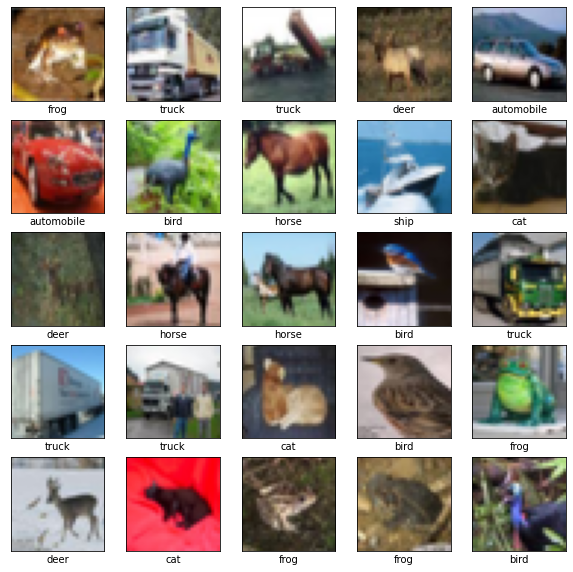

In [3]:
#对数据集中的数据进行验证
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
#构建模型
#Conv2D(32*3*3) -> MaxPool2D(2,2)->Conv2D(64*3*3) 
# -> MaxPool2D(2,2)-> Conv2D(64*3*3) ->Flattn -> Dense(64) ->Dense(10)
model = models.Sequential(
    [layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(10)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
#编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])

Epoch 1/20
1563/1563 [==============================] - 21s 5ms/step - loss: 1.5394 - accuracy: 0.4353 - val_loss: 1.2560 - val_accuracy: 0.5482
Epoch 2/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1614 - accuracy: 0.5884 - val_loss: 1.1006 - val_accuracy: 0.6067
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0165 - accuracy: 0.6417 - val_loss: 1.0348 - val_accuracy: 0.6379
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9165 - accuracy: 0.6763 - val_loss: 0.9285 - val_accuracy: 0.6731
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8417 - accuracy: 0.7041 - val_loss: 0.9264 - val_accuracy: 0.6802
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7825 - accuracy: 0.7233 - val_loss: 0.8879 - val_accuracy: 0.6993
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7343 - accuracy: 0.7433 - val_loss: 0.8675 - val_accura

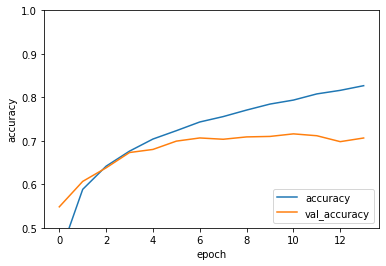

313/313 - 1s - loss: 0.9471 - accuracy: 0.7065 - 722ms/epoch - 2ms/step
0.7064999938011169


In [6]:
#评估模型
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, 
                                     verbose=2)
print(test_acc)
#待提升，模型过拟合，考虑采用drop层或正则化提高模型的泛化能力

下面使用tensorflow对存储在磁盘的花卉数据集进行分类

In [18]:
#导入相关库
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import tensorflow as tf

import pathlib

In [19]:
import tensorflow.keras.layers as layers

In [20]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [21]:
#查看数据集文件分布
!ls /root/.keras/datasets/flower_photos


daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [22]:
#查看图片数据集中花卉图片数量
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


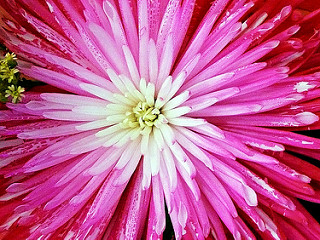

In [23]:
#查看roses文件下的第一张玫瑰花图片
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

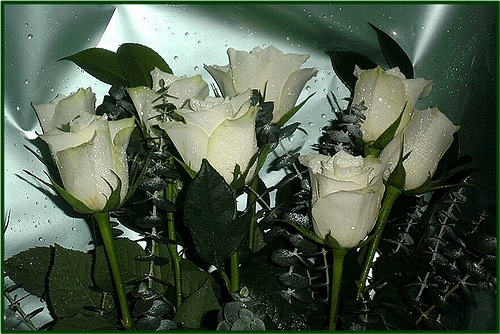

In [24]:
PIL.Image.open(str(roses[1]))

In [25]:
batch_size = 32
img_height = 180
img_width = 180

#将数据集拆分为训练集和验证集
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


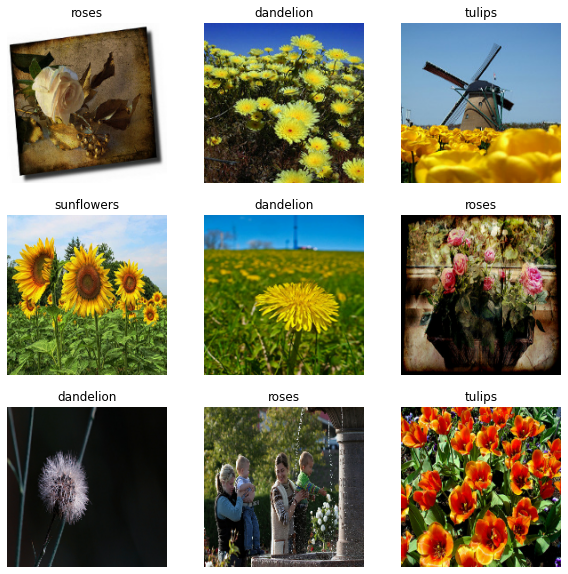

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [27]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [28]:
#配置数据集提高性能，避免IO阻塞
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [29]:
#对图片数据进行归一化处理
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.9870374


In [48]:
#建立模型
model = tf.keras.Sequential([
  layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
  layers.Conv2D(16,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128,activation='relu'),
  layers.Dense(len(class_names))  

])
#编译model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 64)       

In [49]:
#训练模型
epochs = 10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
92/92 [==============================] - 4s 34ms/step - loss: 1.4445 - accuracy: 0.3879 - val_loss: 1.1272 - val_accuracy: 0.5640
Epoch 2/10
92/92 [==============================] - 2s 22ms/step - loss: 1.0663 - accuracy: 0.5783 - val_loss: 0.9868 - val_accuracy: 0.6090
Epoch 3/10
92/92 [==============================] - 2s 23ms/step - loss: 0.8913 - accuracy: 0.6628 - val_loss: 0.9507 - val_accuracy: 0.6185
Epoch 4/10
92/92 [==============================] - 2s 23ms/step - loss: 0.7470 - accuracy: 0.7217 - val_loss: 0.9230 - val_accuracy: 0.6294
Epoch 5/10
92/92 [==============================] - 2s 23ms/step - loss: 0.5456 - accuracy: 0.8025 - val_loss: 1.0167 - val_accuracy: 0.6213
Epoch 6/10
92/92 [==============================] - 2s 23ms/step - loss: 0.3689 - accuracy: 0.8757 - val_loss: 1.0883 - val_accuracy: 0.6281
Epoch 7/10
92/92 [==============================] - 2s 23ms/step - loss: 0.2312 - accuracy: 0.9244 - val_loss: 1.4272 - val_accuracy: 0.6049
Epoch 8/10
92

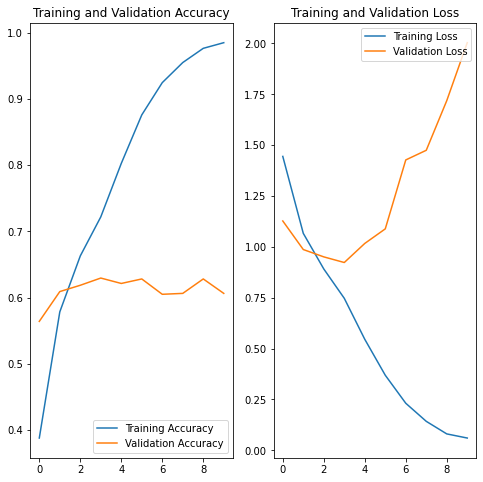

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

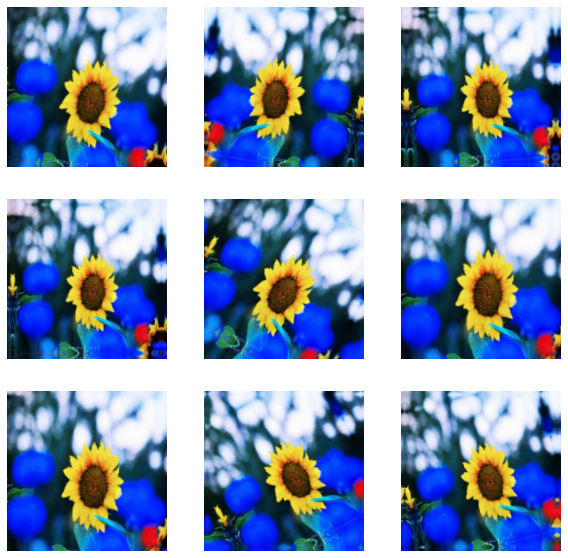

In [30]:
#利用数据增强生成额外的训练数据解决模型过拟合的问题
data_augmentation = tf.keras.Sequential(
    [
     layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1),
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [31]:
model = tf.keras.Sequential([
  data_augmentation, #数据增强
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),#正则化层
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [32]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
92/92 [==============================] - 16s 41ms/step - loss: 1.2774 - accuracy: 0.4469 - val_loss: 1.0196 - val_accuracy: 0.5831
Epoch 2/15
92/92 [==============================] - 2s 26ms/step - loss: 1.0198 - accuracy: 0.5940 - val_loss: 1.0886 - val_accuracy: 0.5763
Epoch 3/15
92/92 [==============================] - 3s 28ms/step - loss: 0.9143 - accuracy: 0.6396 - val_loss: 0.9718 - val_accuracy: 0.5995
Epoch 4/15
92/92 [==============================] - 2s 26ms/step - loss: 0.8491 - accuracy: 0.6713 - val_loss: 0.8591 - val_accuracy: 0.6390
Epoch 5/15
92/92 [==============================] - 2s 26ms/step - loss: 0.8050 - accuracy: 0.6884 - val_loss: 0.7990 - val_accuracy: 0.6703
Epoch 6/15
92/92 [==============================] - 2s 26ms/step - loss: 0.7507 - accuracy: 0.7125 - val_loss: 0.8544 - val_accuracy: 0.6649
Epoch 7/15
92/92 [==============================] - 2s 26ms/step - loss: 0.7274 - accuracy: 0.7193 - val_loss: 0.7662 - val_accuracy: 0.6894
Epoch 8/15
9

In [33]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to sunflowers with a 98.96 percent confidence.


[[-5.4869046  0.633664   2.1392188  7.6909833  2.5325365]]
tf.Tensor([1.8723290e-06 8.5214089e-04 3.8403028e-03 9.8961473e-01 5.6909034e-03], shape=(5,), dtype=float32)
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


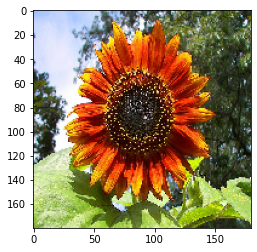

In [34]:
plt.imshow(img)
print(predictions)
print(score)
print(class_names)

In [35]:
img_array

<tf.Tensor: shape=(1, 180, 180, 3), dtype=float32, numpy=
array([[[[151., 189., 252.],
         [152., 190., 253.],
         [154., 190., 252.],
         ...,
         [ 49.,  68.,  49.],
         [123., 124., 129.],
         [ 27.,   6.,  15.]],

        [[154., 192., 255.],
         [155., 191., 253.],
         [156., 192., 254.],
         ...,
         [ 34.,  61.,  28.],
         [ 29.,  75.,  49.],
         [ 27.,  71.,  44.]],

        [[158., 194., 255.],
         [155., 191., 253.],
         [158., 192., 253.],
         ...,
         [ 44.,  53.,  24.],
         [ 39.,  62.,  36.],
         [ 35.,  57.,  34.]],

        ...,

        [[124., 166.,  56.],
         [123., 164.,  62.],
         [172., 209., 113.],
         ...,
         [ 48.,  60.,  50.],
         [ 36.,  50.,  25.],
         [ 70.,  87.,  42.]],

        [[169., 219.,  98.],
         [129., 175.,  66.],
         [116., 160.,  49.],
         ...,
         [ 50.,  62.,  48.],
         [ 34.,  51.,  33.],
         